# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
with open('data/data_description.txt', 'r') as f:
    data = f.readlines()
    print(data)


['MSSubClass: Identifies the type of dwelling involved in the sale.\t\n', '\n', '        20\t1-STORY 1946 & NEWER ALL STYLES\n', '        30\t1-STORY 1945 & OLDER\n', '        40\t1-STORY W/FINISHED ATTIC ALL AGES\n', '        45\t1-1/2 STORY - UNFINISHED ALL AGES\n', '        50\t1-1/2 STORY FINISHED ALL AGES\n', '        60\t2-STORY 1946 & NEWER\n', '        70\t2-STORY 1945 & OLDER\n', '        75\t2-1/2 STORY ALL AGES\n', '        80\tSPLIT OR MULTI-LEVEL\n', '        85\tSPLIT FOYER\n', '        90\tDUPLEX - ALL STYLES AND AGES\n', '       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n', '       150\t1-1/2 STORY PUD - ALL AGES\n', '       160\t2-STORY PUD - 1946 & NEWER\n', '       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n', '       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n', '\n', 'MSZoning: Identifies the general zoning classification of the sale.\n', '\t\t\n', '       A\tAgriculture\n', '       C\tCommercial\n', '       FV\tFloating Village Residential

In [3]:
df = pd.read_csv('data/ames.csv', index_col=0)
df


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


The following code checks that you loaded the data correctly:

In [4]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [5]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [7]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

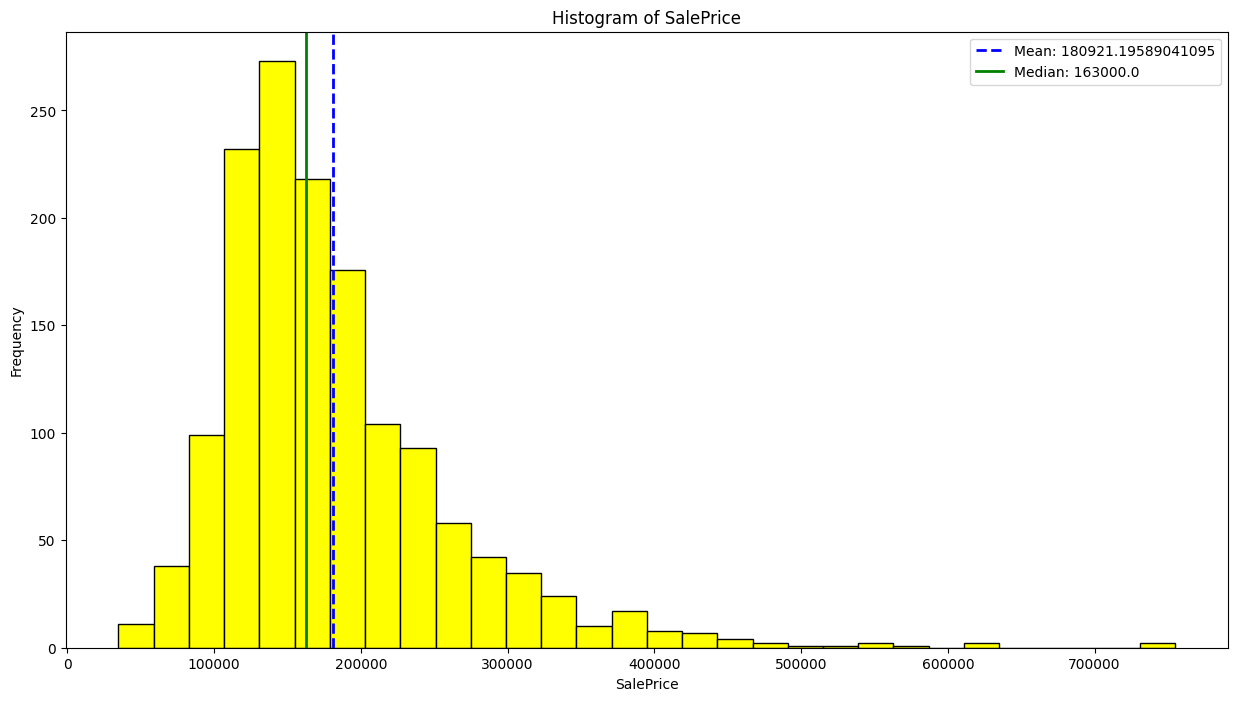

In [7]:
# Your code here
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(df['SalePrice'], bins=30, color='yellow', edgecolor='black')

mean_value = df['SalePrice'].mean()
ax.axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value}')
median_value = df['SalePrice'].median()
ax.axvline(median_value, color='green', linestyle='-', linewidth=2, label=f'Median: {median_value}')

ax.set_title('Histogram of SalePrice')
ax.set_xlabel('SalePrice')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

Now, print out the mean, median, and standard deviation:

In [8]:
# Your code here
mean_of_SalePrice = df['SalePrice'].mean()
print(f'The mean of SalePrice is: {mean_of_SalePrice}')
median_of_SalePrice = df['SalePrice'].median()
print(f'The median of SalePrice is: {median_of_SalePrice}')
stdev_of_SalePrice = df['SalePrice'].std()
print(f'The stdev of SalePrice is: {stdev_of_SalePrice}')

The mean of SalePrice is: 180921.19589041095
The median of SalePrice is: 163000.0
The stdev of SalePrice is: 79442.50288288663


In the cell below, interpret the above information.

In [9]:
# Replace None with appropriate text
"""
As more houses are sold, the SalePrice increases but as SalePrice increases, the buying decreases.
"""

'\nAs more houses are sold, the SalePrice increases but as SalePrice increases, the buying decreases.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

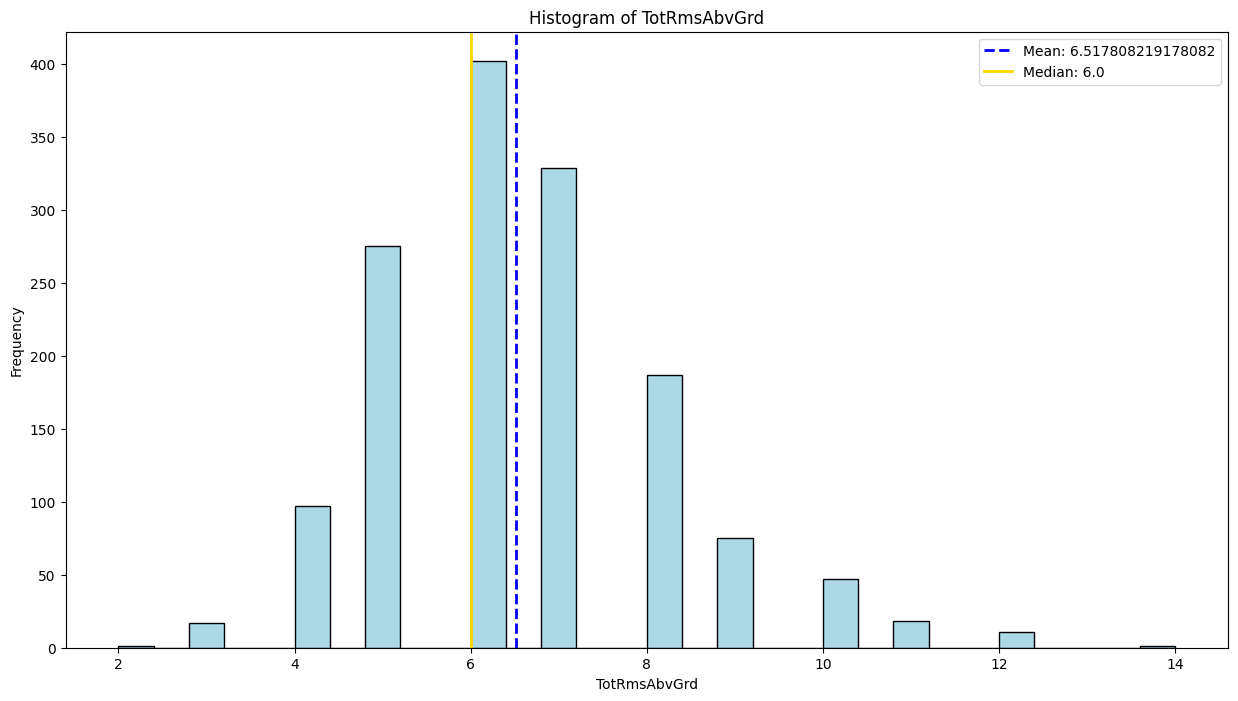

In [10]:
# Your code here
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(df['TotRmsAbvGrd'], bins=30, color='lightblue', edgecolor='black')

mean_value = df['TotRmsAbvGrd'].mean()
ax.axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value}')
median_value = df['TotRmsAbvGrd'].median()
ax.axvline(median_value, color='gold', linestyle='-', linewidth=2, label=f'Median: {median_value}')

ax.set_title('Histogram of TotRmsAbvGrd')
ax.set_xlabel('TotRmsAbvGrd')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

Now, print out the mean, median, and standard deviation:

In [11]:
# Your code here
mean_of_TotRmsAbvGrd = df['TotRmsAbvGrd'].mean()
print(f'The mean of TotRmsAbvGrd is: {mean_of_TotRmsAbvGrd}')
median_of_TotRmsAbvGrd = df['TotRmsAbvGrd'].median()
print(f'The median of TotRmsAbvGrd is: {median_of_TotRmsAbvGrd}')
stdev_of_TotRmsAbvGrd = df['TotRmsAbvGrd'].std()
print(f'The stdev of TotRmsAbvGrd is: {stdev_of_TotRmsAbvGrd}')

The mean of TotRmsAbvGrd is: 6.517808219178082
The median of TotRmsAbvGrd is: 6.0
The stdev of TotRmsAbvGrd is: 1.625393290584064


In the cell below, interpret the above information.

In [12]:
# Replace None with appropriate text
"""
As the frequency of the housing is increased, so as the TotRmsAbvGrd increases but if the TotRmsAbvGrd goes high, so as the frequency of the housing reduces
"""

'\nAs the frequency of the housing is increased, so as the TotRmsAbvGrd increases but if the TotRmsAbvGrd goes high, so as the frequency of the housing reduces\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

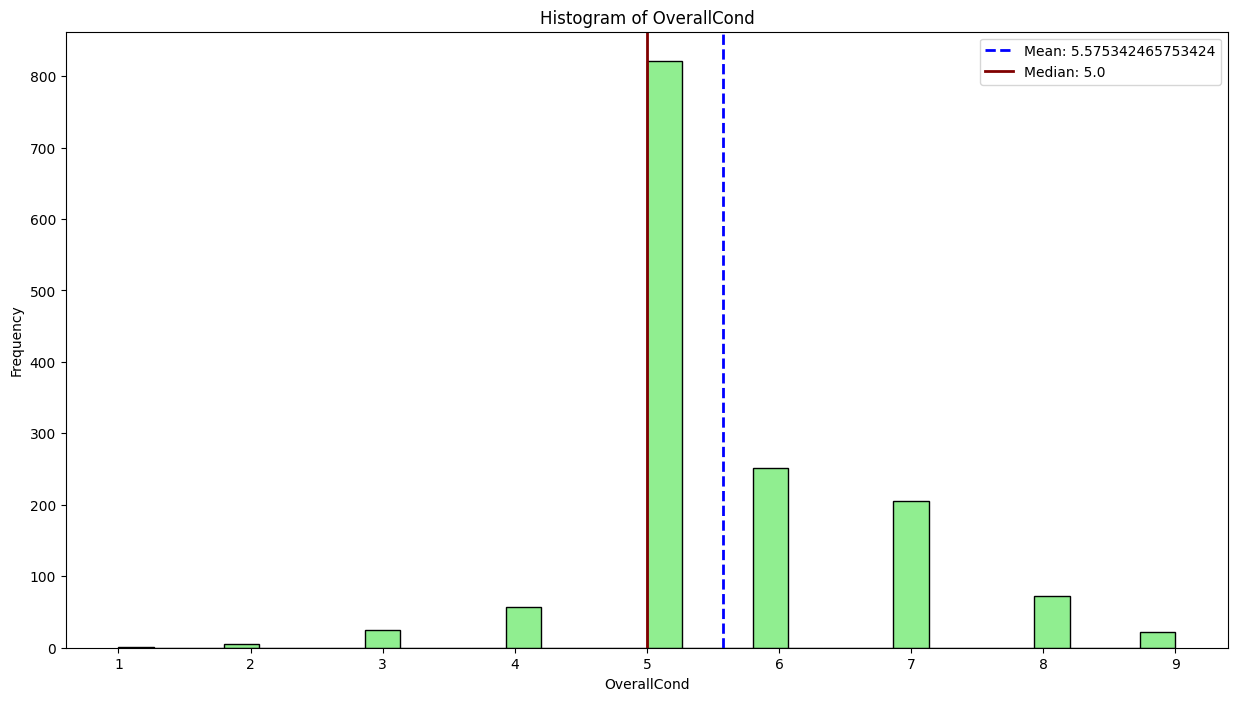

In [13]:
# Your code here
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(df['OverallCond'], bins=30, color='lightgreen', edgecolor='black')

mean_value = df['OverallCond'].mean()
ax.axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value}')
median_value = df['OverallCond'].median()
ax.axvline(median_value, color='maroon', linestyle='-', linewidth=2, label=f'Median: {median_value}')

ax.set_title('Histogram of OverallCond')
ax.set_xlabel('OverallCond')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

Now, print out the mean, median, and standard deviation:

In [14]:
# Your code here
mean_of_OverallCond = df['OverallCond'].mean()
print(f'The mean of OverallCond is: {mean_of_OverallCond}')
median_of_OverallCond = df['OverallCond'].median()
print(f'The median of OverallCond is: {median_of_OverallCond}')
stdev_of_OverallCond = df['OverallCond'].std()
print(f'The stdev of OverallCond is: {stdev_of_OverallCond}')

The mean of OverallCond is: 5.575342465753424
The median of OverallCond is: 5.0
The stdev of OverallCond is: 1.1127993367127367


In the cell below, interpret the above information.

In [15]:
# Replace None with appropriate text
"""
As the Frequency increases, so as the overall condition of the housing increses but it drops rapidly due to less frequency.
"""

'\nAs the Frequency increases, so as the overall condition of the housing increses but it drops rapidly due to less frequency.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [16]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [17]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

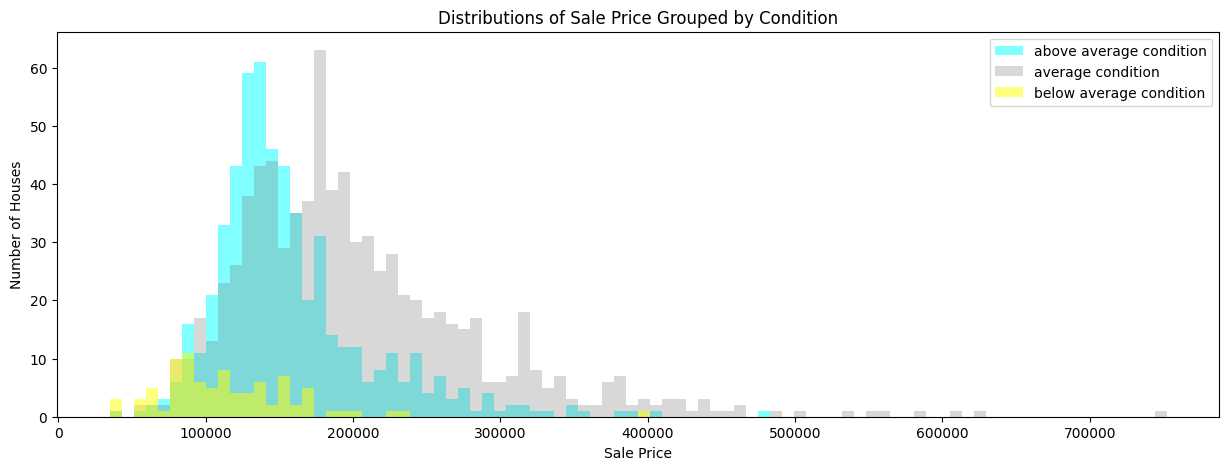

In [18]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [20]:
# Replace None with appropriate text
"""
The average condition is high as compared to the above-average condition and below-average condition. Also, the prices continue to appear
for the average condition.
"""

'\nThe average condition is high as compared to the above-average condition and below-average condition. Also, the prices continue to appear\nfor the average condition.\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [24]:
# Calculate the Pearson correlation matrix
correlation_matrix = df.corr(numeric_only=True)

In [25]:
# Your code here
# Exclude SalePrice itself
saleprice_correlations = correlation_matrix['SalePrice'].drop('SalePrice')

# Find the column with the highest positive correlation with SalePrice
most_correlated_column = saleprice_correlations.idxmax()
highest_correlation = saleprice_correlations.max()

# Print the result
print(f"The column most positively correlated with SalePrice is '{most_correlated_column}' with a correlation coefficient of {highest_correlation:.2f}.")


The column most positively correlated with SalePrice is 'OverallQual' with a correlation coefficient of 0.79.


Now, find the ***most negatively correlated*** column:

In [29]:
# Exclude SalePrice itself
saleprice_correlations = correlation_matrix['SalePrice'].drop('SalePrice')

# Find the column with the highest negative correlation with SalePrice
most_negatively_correlated_column = saleprice_correlations.idxmin()
lowest_correlation = saleprice_correlations.min()

# Print the result
print(f"The column most negatively correlated with SalePrice is '{most_negatively_correlated_column}' with a correlation coefficient of {lowest_correlation:.2f}.")


The column most negatively correlated with SalePrice is 'KitchenAbvGr' with a correlation coefficient of -0.14.


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

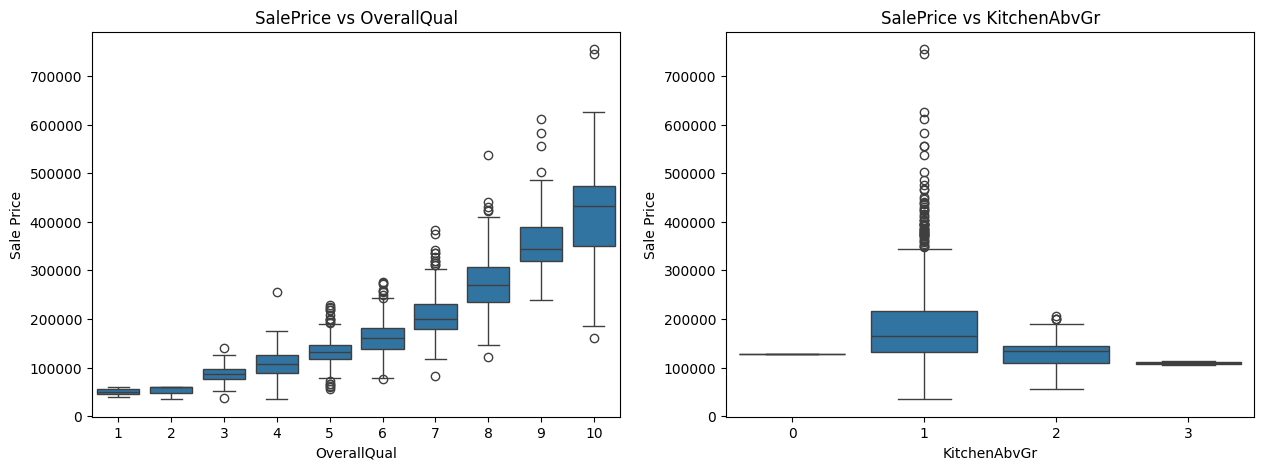

In [32]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df["OverallQual"],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df["KitchenAbvGr"],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("SalePrice vs OverallQual")
ax1.set_xlabel("OverallQual")
ax1.set_ylabel("Sale Price")
ax2.set_title("SalePrice vs KitchenAbvGr")
ax2.set_xlabel("KitchenAbvGr")
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [ ]:
# Replace None with appropriate text
"""
None
"""

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [33]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

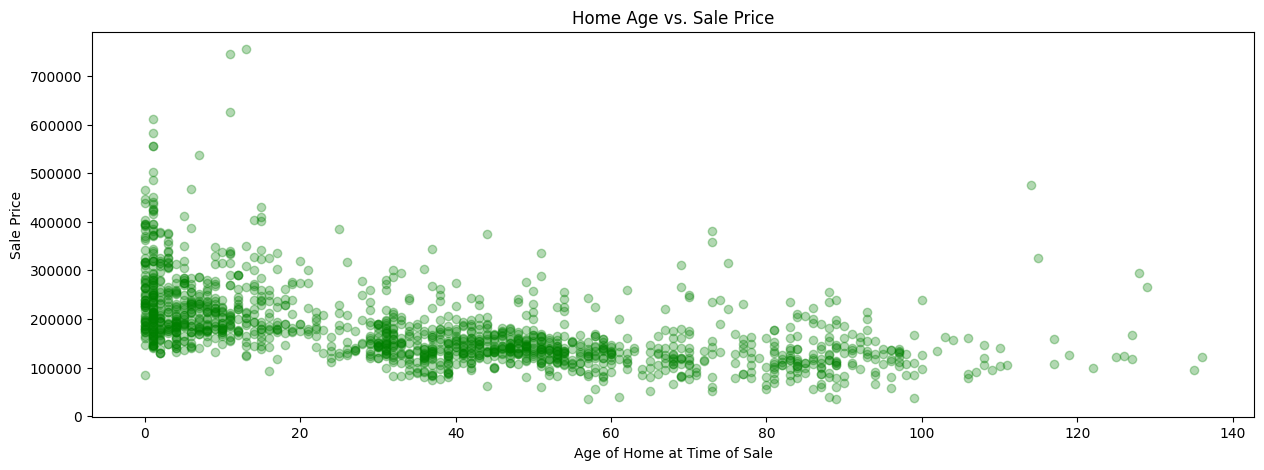

In [34]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [35]:
# Replace None with appropriate text
"""
When the new homes are at an early age, it leads to high selling price but as the homes age more with time, the selling price of the
homes decrease.
"""

'\nWhen the new homes are at an early age, it leads to high selling price but as the homes age more with time, the selling price of the\nhomes decrease.\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.